In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('/kaggle/input/diabetes-prediction/Diabetes_prediction.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis
0,2,115.863387,56.410731,24.336736,94.385783,26.455940,0.272682,20.100494,0
1,2,92.490122,70.615520,23.443591,138.652426,23.910167,0.665160,44.912281,0
2,1,88.141469,63.262618,23.404364,149.358082,21.948250,0.676022,48.247873,1
3,2,108.453101,67.793632,20.751580,108.751638,24.209304,0.289636,42.749868,0
4,1,127.849443,94.725685,22.603078,25.269987,32.997477,0.601315,32.797789,0


In [3]:
df.shape[0]

1000

In [4]:
df.shape[1]

9

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1000 non-null   int64  
 1   Glucose                   1000 non-null   float64
 2   BloodPressure             1000 non-null   float64
 3   SkinThickness             1000 non-null   float64
 4   Insulin                   1000 non-null   float64
 5   BMI                       1000 non-null   float64
 6   DiabetesPedigreeFunction  1000 non-null   float64
 7   Age                       1000 non-null   float64
 8   Diagnosis                 1000 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 70.4 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1.771000,99.440607,72.179837,23.278316,84.582679,25.433600,0.449383,43.281798,0.30600
std,1.354398,19.470730,13.882017,1.173807,74.872733,3.690223,0.199334,14.465398,0.46106
min,0.000000,30.571402,31.401487,19.369987,-165.310033,13.548818,0.100037,-0.979804,0.00000
25%,1.000000,86.145927,62.795447,22.501591,35.076535,23.022715,0.283376,33.518451,0.00000
50%,2.000000,99.458362,71.909588,23.275225,84.442232,25.455649,0.448219,43.634273,0.00000
75%,3.000000,113.264556,82.082660,24.052022,134.267842,27.972184,0.619158,53.098446,1.00000
max,8.000000,161.238939,110.723715,26.917654,317.701852,36.324598,0.799654,90.573782,1.00000


In [7]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Diagnosis                   0
dtype: int64

In [8]:
data=df.corr()
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis
Pregnancies,1.000000,0.011362,0.077683,-0.040438,-0.020708,-0.006228,-0.001419,0.088453,-0.001484
Glucose,0.011362,1.000000,0.010261,0.002874,-0.010334,0.002024,0.005122,-0.003056,-0.004971
BloodPressure,0.077683,0.010261,1.000000,-0.038723,0.044350,-0.000791,-0.007349,0.049709,0.010349
SkinThickness,-0.040438,0.002874,-0.038723,1.000000,0.044425,0.062209,-0.054404,-0.047309,-0.000014
Insulin,-0.020708,-0.010334,0.044350,0.044425,1.000000,0.044684,-0.026908,0.037062,0.035411
BMI,-0.006228,0.002024,-0.000791,0.062209,0.044684,1.000000,-0.020680,-0.066314,-0.033336
DiabetesPedigreeFunction,-0.001419,0.005122,-0.007349,-0.054404,-0.026908,-0.020680,1.000000,0.017163,0.060549
Age,0.088453,-0.003056,0.049709,-0.047309,0.037062,-0.066314,0.017163,1.000000,-0.044726
Diagnosis,-0.001484,-0.004971,0.010349,-0.000014,0.035411,-0.033336,0.060549,-0.044726,1.000000


<Axes: >

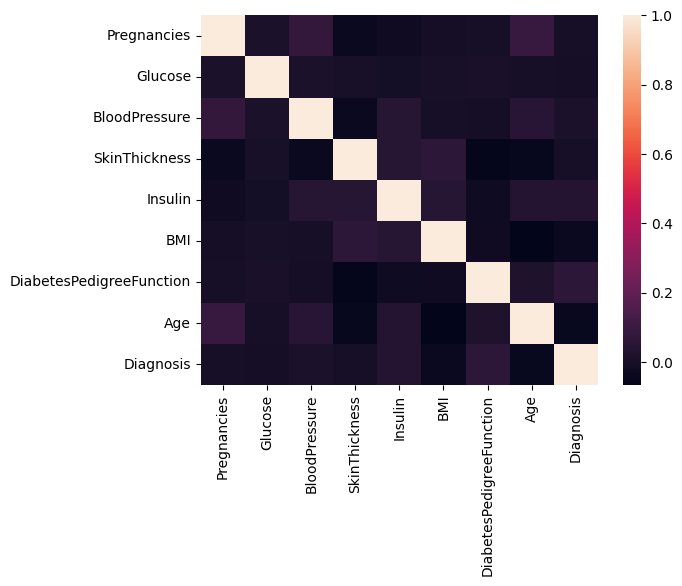

In [9]:
sns.heatmap(data)

In [10]:
df.Diagnosis.value_counts()

Diagnosis
0    694
1    306
Name: count, dtype: int64

In [11]:
df.Pregnancies.value_counts()

Pregnancies
1    285
2    262
0    185
3    157
4     73
5     31
6      6
8      1
Name: count, dtype: int64

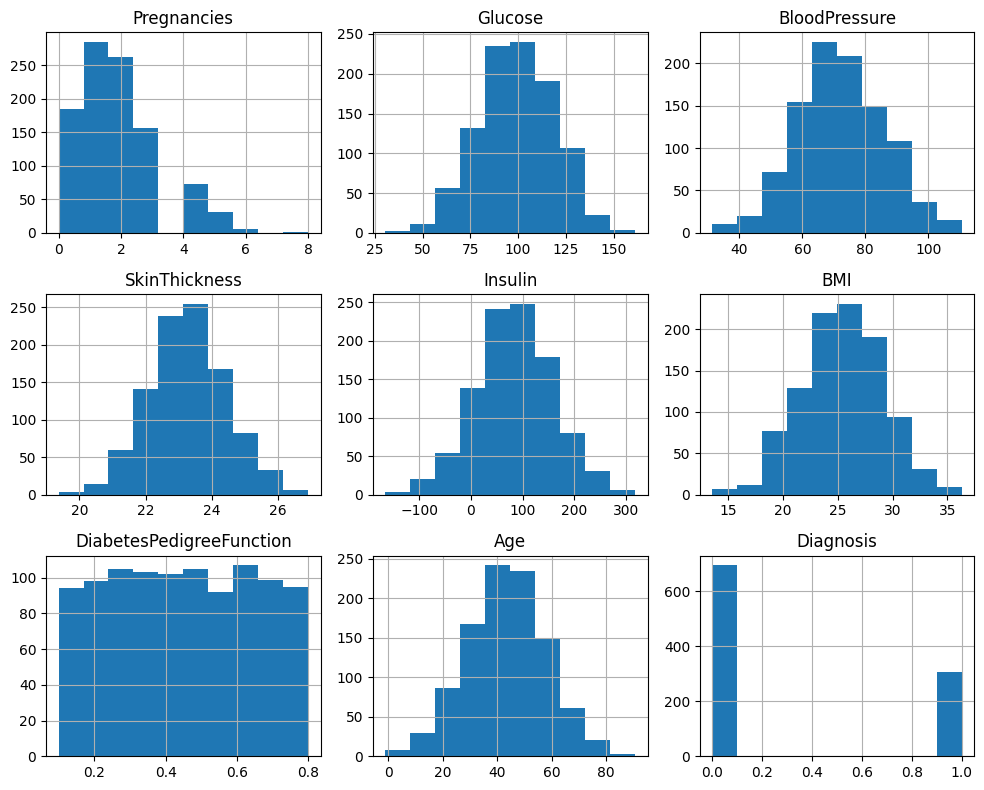

In [12]:
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

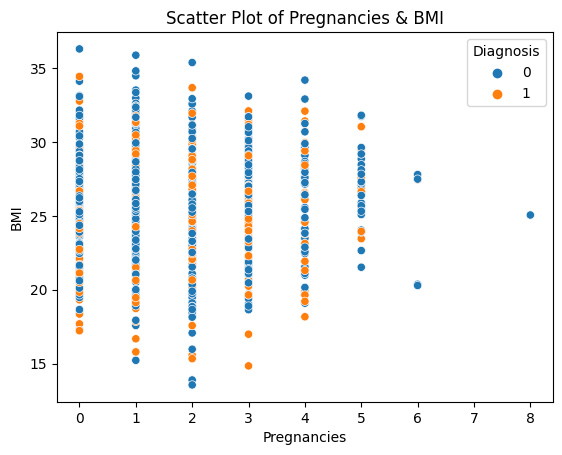

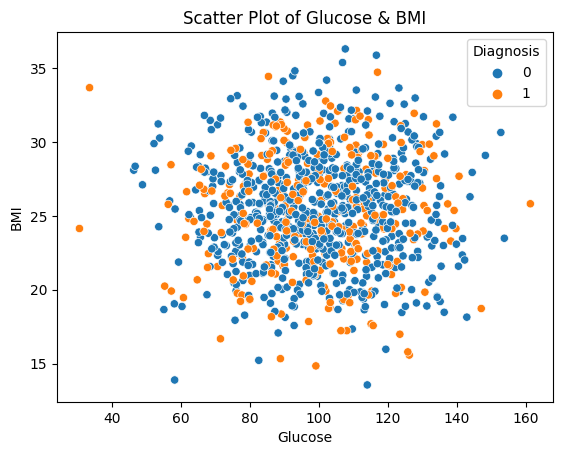

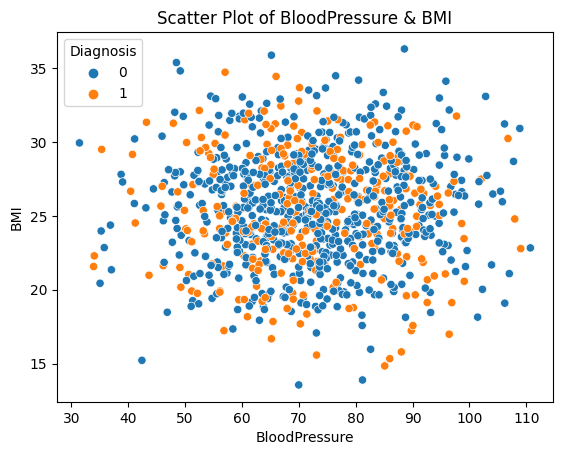

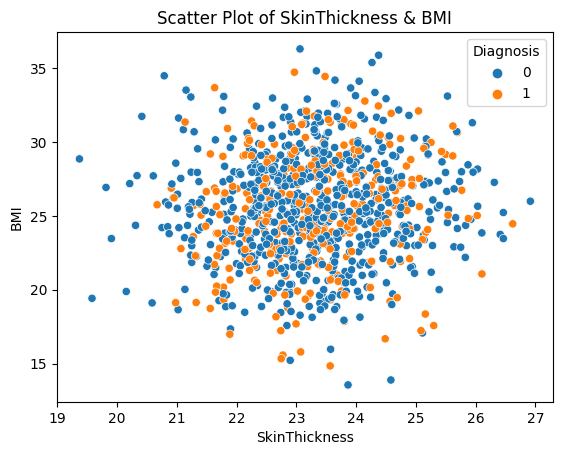

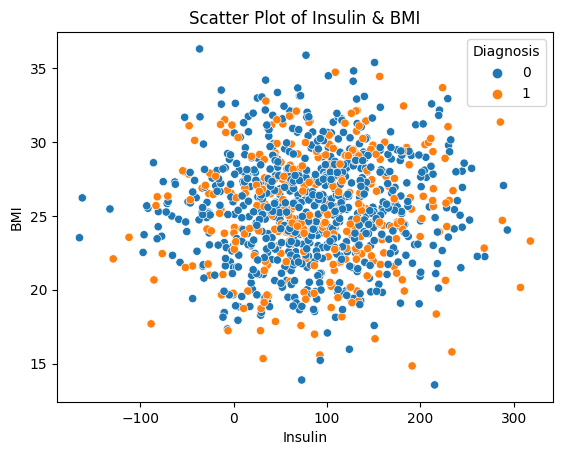

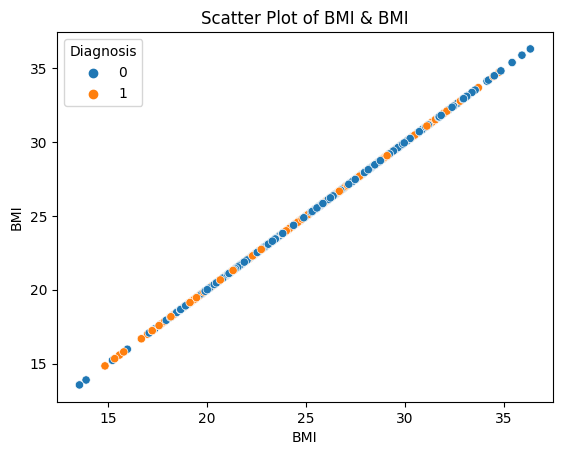

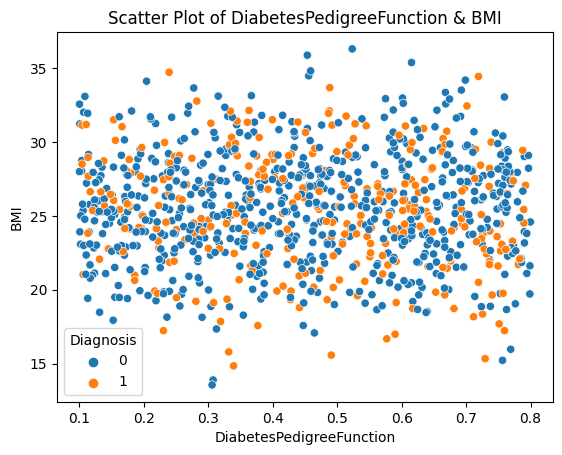

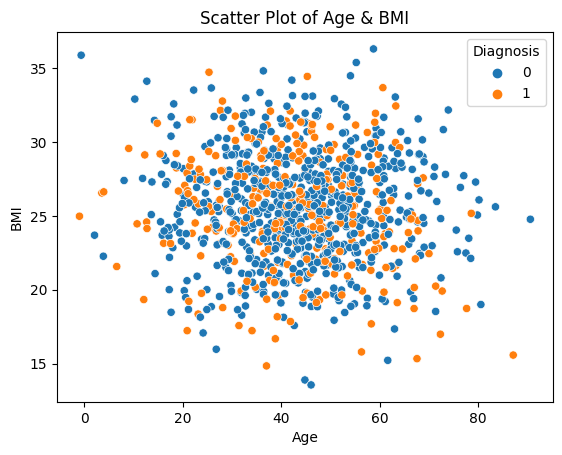

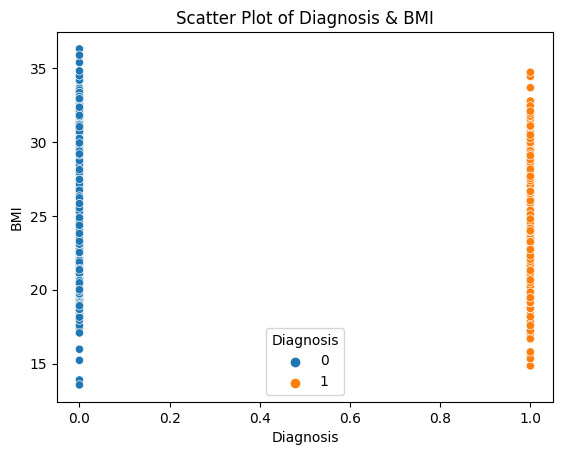

In [13]:
for i in df:
    sns.scatterplot(x=df[i], y=df['BMI'], hue='Diagnosis', data=df)
    plt.title(f'Scatter Plot of {i} & BMI')
    plt.ylabel('BMI')
    plt.xlabel(f'{i}')
    plt.show()